    Age  Experience  Rank Nationality   Go
0    36          10     9          UK   NO
1    42          12     4         USA   NO
2    23           4     6           N   NO
3    52           4     4         USA   NO
4    43          21     8         USA  YES
5    44          14     5          UK   NO
6    66           3     7           N  YES
7    35          14     9          UK  YES
8    52          13     7           N  YES
9    35           5     9           N  YES
10   24           3     5         USA   NO
11   18           3     7          UK  YES
12   45           9     9          UK  YES
Unique Nationalities: ['UK' 'USA' 'N']
Unique Go values: ['NO' 'YES']
{'UK': 0, 'USA': 1, 'N': 2}
    Age  Experience  Rank  Nationality   Go
0    36          10     9            0   NO
1    42          12     4            1   NO
2    23           4     6            2   NO
3    52           4     4            1   NO
4    43          21     8            1  YES
5    44          14     5           

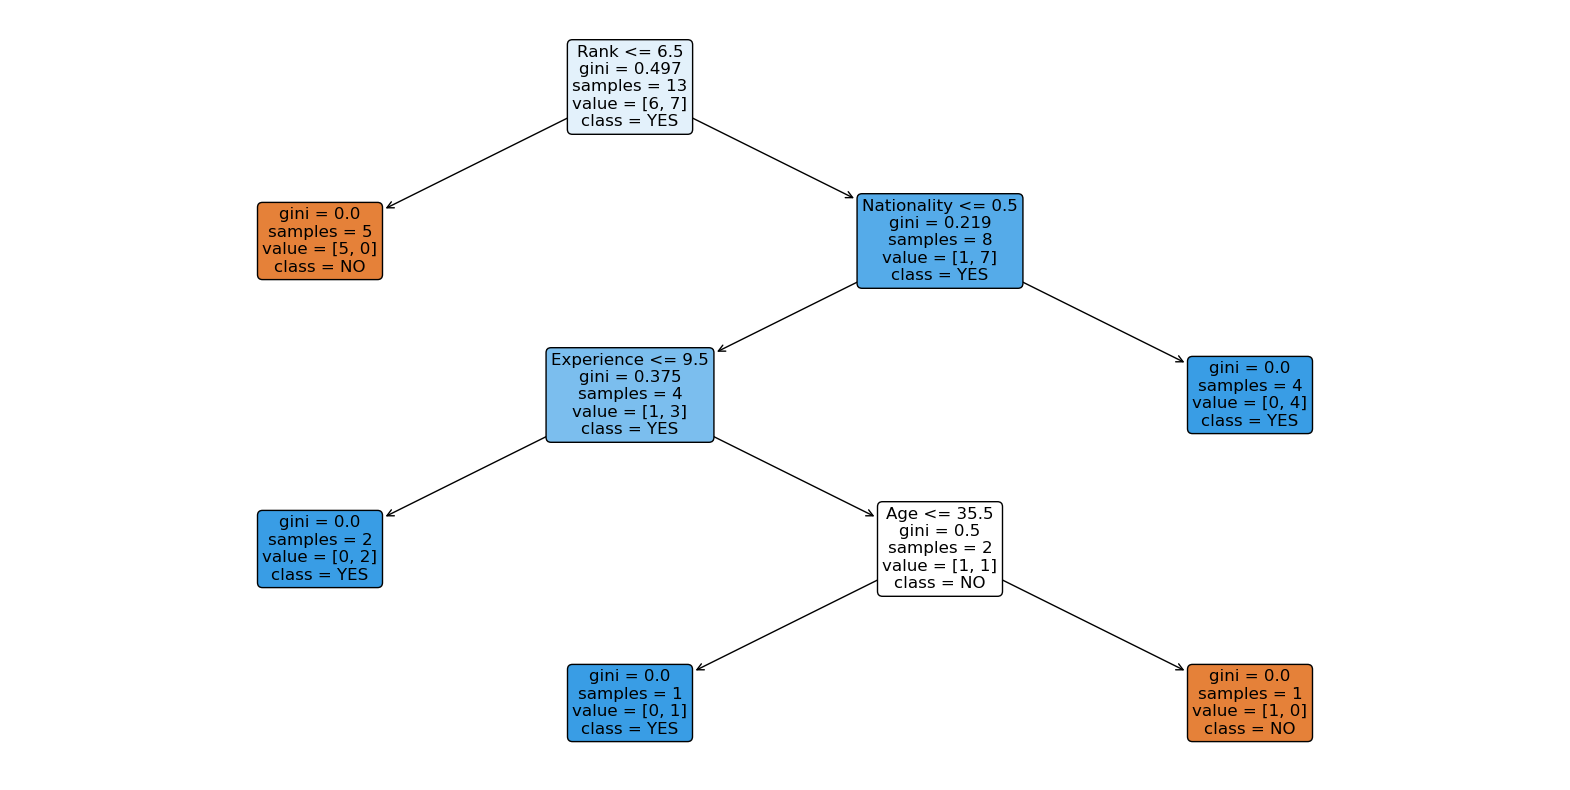

Prediction for test case [[40, 10, 7, 1]]: [1]
Accuracy of the model: 0.8


c:\Users\Admin\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


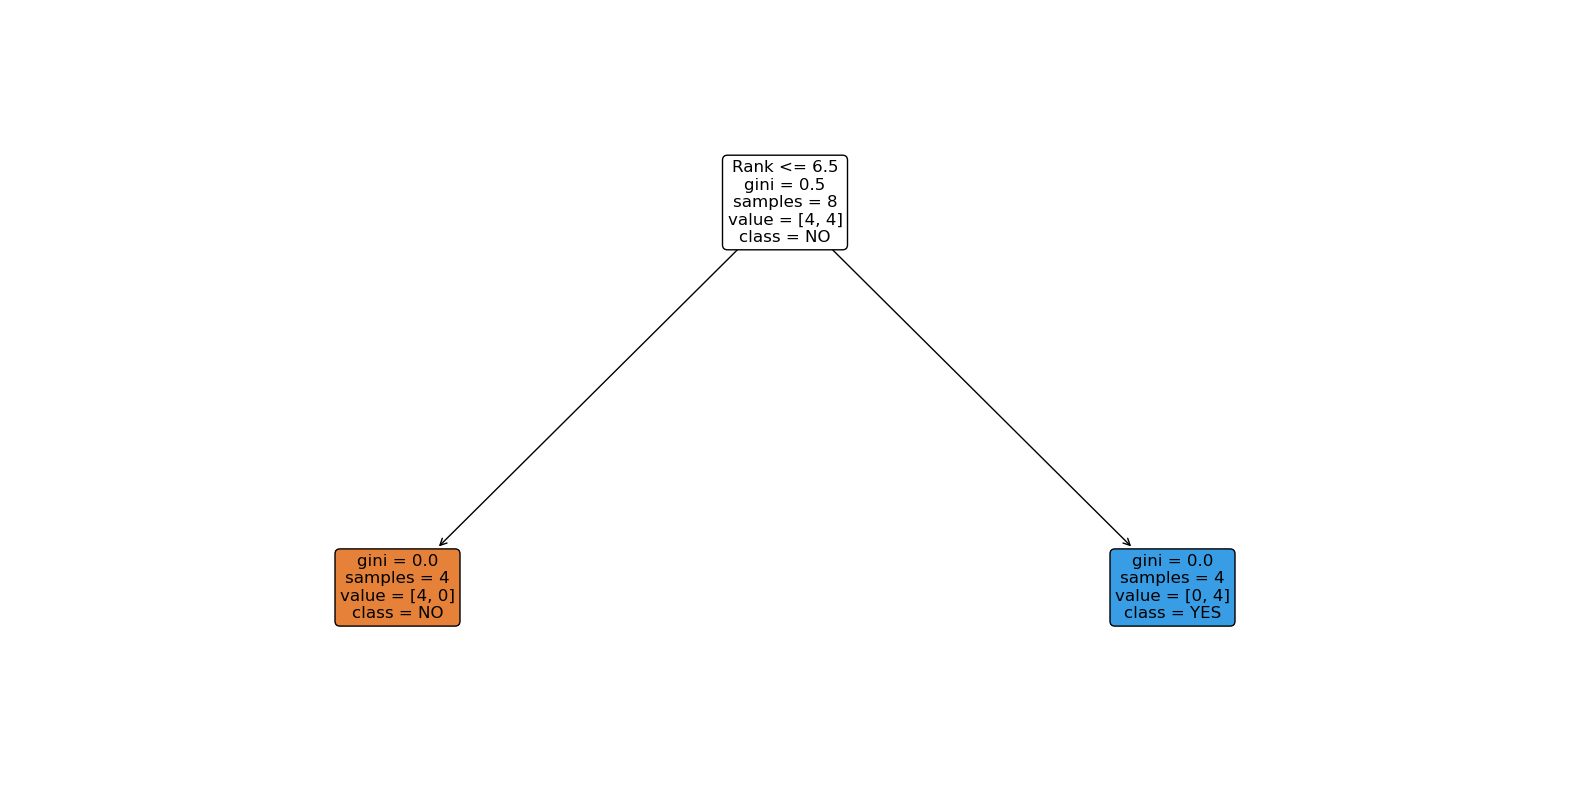

In [23]:
#Bài 1
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# a. Đọc file csv vào DataFrame
df = pd.read_csv('participants.csv')

# Loại bỏ khoảng trắng thừa từ tên cột
df.columns = df.columns.str.strip()

# b. Hiển thị lại dữ liệu đã đọc
print(df)

# c. Hiển thị toàn bộ các loại dữ liệu cho cột Nationality (giá trị không trùng nhau)
unique_nationalities = df['Nationality'].unique()
print("Unique Nationalities:", unique_nationalities)

# d. Hiển thị toàn bộ các loại dữ liệu cho cột Go (giá trị không trùng nhau)
unique_go = df['Go'].unique()
print("Unique Go values:", unique_go)

# e. Thay đổi giá trị cho Nationality
df_nation = df['Nationality'].unique()
map_value_nation = {}
index = 0
for nation in df_nation:
    new_value = {nation: index}
    map_value_nation.update(new_value)
    index += 1
print(map_value_nation)

df['Nationality'] = df['Nationality'].map(map_value_nation)
print(df)

# f. Thay đổi giá trị cho Go
map_value_go = {'YES': 1, 'NO': 0}
df['Go'] = df['Go'].map(map_value_go)
print(df)

# g. Chia DataFrame X (feature columns) và DataFrame Y (target column)
X = df[['Age', 'Experience', 'Rank', 'Nationality']]
Y = df['Go']

# h. Dùng DecisionTreeClassifier từ scikit-learn để huấn luyện
dtree = DecisionTreeClassifier()
dtree = dtree.fit(X, Y)

# i. Hiển thị cây dự đoán đã huấn luyện dưới dạng văn bản
tree_text = export_text(dtree, feature_names=['Age', 'Experience', 'Rank', 'Nationality'])
print(tree_text)

# Hiển thị cây dưới dạng bảng sử dụng matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(dtree, feature_names=['Age', 'Experience', 'Rank', 'Nationality'], class_names=['NO', 'YES'], filled=True, rounded=True, fontsize=12)
plt.savefig('decision_tree_plot.png')
plt.show()

# j. Kiểm thử với case [[40, 10, 7, 1]]
test_case = [[40, 10, 7, 1]]
prediction = dtree.predict(test_case)
print("Prediction for test case [[40, 10, 7, 1]]:", prediction)

# k. Chia dữ liệu phân lớp theo phương pháp Hold out (2/3 training và 1/3 testing)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/3, random_state=42)
dtree_holdout = DecisionTreeClassifier()
dtree_holdout = dtree_holdout.fit(X_train, Y_train)

# Kiểm thử và tính toán độ chính xác của mô hình
accuracy = dtree_holdout.score(X_test, Y_test)
print("Accuracy of the model:", accuracy)

plt.figure(figsize=(20,10))
tree.plot_tree(dtree_holdout, feature_names=['Age', 'Experience', 'Rank', 'Nationality'], class_names=['NO', 'YES'], filled=True, rounded=True, fontsize=12)
plt.savefig('decision_tree_holdout_plot.png')
plt.show()


In [33]:
pip install graphviz
#Sau đó còn phải down graphviz ở trên mạng nữa mới chạy được dòng code phía dưới (kéo xuống thêm và chạy bản thay thế - không có graphviz)

   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/47.1 kB ? eta -:--:--
   -------- ------------------------------- 10.2/47.1 kB ? eta -:--:--
   ----------------- ---------------------- 20.5/47.1 kB 165.2 kB/s eta 0:00:01
   ----------------- ---------------------- 20.5/47.1 kB 165.2 kB/s eta 0:00:01
   -------------------------- ------------- 30.7/47.1 kB 163.8 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 164.3 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 164.3 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 164.3 kB/s eta 0:00:01
   ---------------------------------- ----- 41.0/47.1 kB 164.3 kB/s eta 0:00:01
   ---------------------------------------- 47.1/47.1 kB 102.7 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [35]:
#Bài 2 (với graphviz - download graphviz về máy rồi mới chạy được code này)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
import graphviz
from sklearn import tree

# a. Đọc file csv vào DataFrame
df = pd.read_csv('weather.csv')

# Loại bỏ khoảng trắng thừa từ tên cột
df.columns = df.columns.str.strip()

# b. Hiển thị lại dữ liệu đã đọc
print(df)

# Encoding categorical features
df_encoded = pd.get_dummies(df[['Outlook', 'Temperature', 'Humidity', 'Wind']])

# Extracting features and target
X = df_encoded
y = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# Exporting the decision tree rules
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

# Visualizing the decision tree using graphviz
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=list(X.columns),  
                                class_names=model.classes_,  
                                filled=True, rounded=True,  
                                special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.render("decision_tree")

graph

# Creating the case to classify with all features set to 0 initially
case = pd.DataFrame(columns=X.columns)
case.loc[0] = 0  # set all features to 0
case['Outlook_Sunny'] = 1
case['Temperature_Hot'] = 1
case['Humidity_High'] = 1
case['Wind_Weak'] = 1

# Predicting the class for the given case
prediction = model.predict(case)
print("Predicted class for the case:", prediction[0])


     Outlook Temperature Humidity    Wind Class
0      Sunny         Hot     High    Weak    No
1      Sunny         Hot     High  Strong    No
2   Overcast         Hot     High    Weak   Yes
3       Rain        Mild     High    Weak   Yes
4       Rain        Cool   Normal    Weak   Yes
5       Rain        Cool   Normal  Strong    No
6   Overcast        Cool   Normal  Strong   Yes
7      Sunny        Mild     High    Weak    No
8      Sunny        Cool   Normal    Weak   Yes
9       Rain        Mild   Normal    Weak   Yes
10     Sunny        Mild   Normal  Strong   Yes
11  Overcast        Mild     High  Strong   Yes
12  Overcast         Hot   Normal    Weak   Yes
13      Rain        Mild     High  Strong    No
|--- Outlook_Overcast <= 0.50
|   |--- Wind_Weak <= 0.50
|   |   |--- Humidity_High <= 0.50
|   |   |   |--- class: No
|   |   |--- Humidity_High >  0.50
|   |   |   |--- class: No
|   |--- Wind_Weak >  0.50
|   |   |--- Temperature_Mild <= 0.50
|   |   |   |--- class: Yes
|   | 

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

     Outlook Temperature Humidity    Wind Class
0      Sunny         Hot     High    Weak    No
1      Sunny         Hot     High  Strong    No
2   Overcast         Hot     High    Weak   Yes
3       Rain        Mild     High    Weak   Yes
4       Rain        Cool   Normal    Weak   Yes
5       Rain        Cool   Normal  Strong    No
6   Overcast        Cool   Normal  Strong   Yes
7      Sunny        Mild     High    Weak    No
8      Sunny        Cool   Normal    Weak   Yes
9       Rain        Mild   Normal    Weak   Yes
10     Sunny        Mild   Normal  Strong   Yes
11  Overcast        Mild     High  Strong   Yes
12  Overcast         Hot   Normal    Weak   Yes
13      Rain        Mild     High  Strong    No
|--- Outlook_Overcast <= 0.50
|   |--- Wind_Weak <= 0.50
|   |   |--- Humidity_High <= 0.50
|   |   |   |--- class: No
|   |   |--- Humidity_High >  0.50
|   |   |   |--- class: No
|   |--- Wind_Weak >  0.50
|   |   |--- Temperature_Mild <= 0.50
|   |   |   |--- class: Yes
|   | 

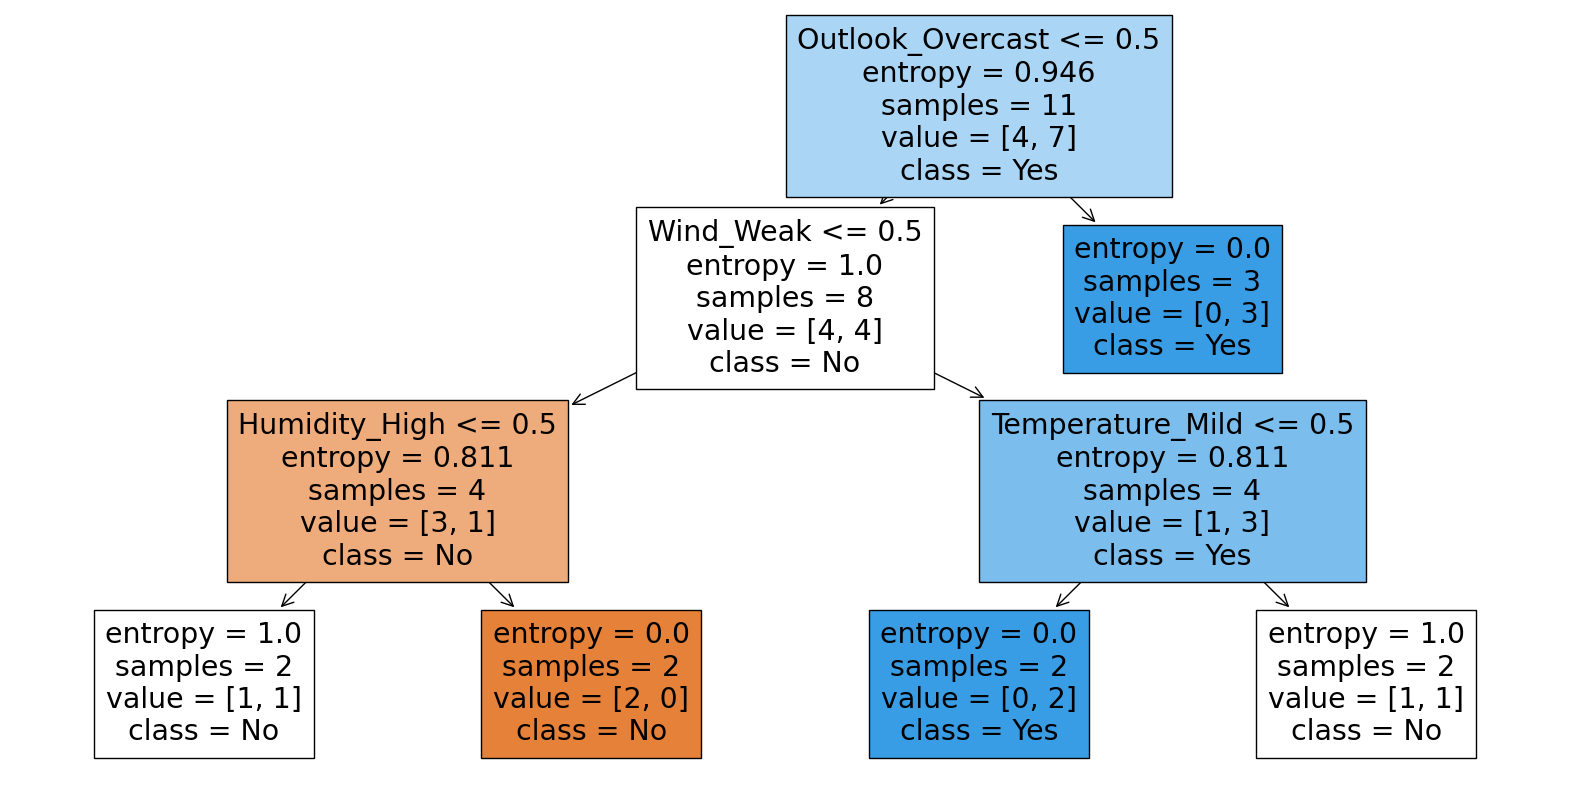

Predicted class for the case: Yes


In [36]:
#Bài 2 (Bản thay thế - Chạy bản này)
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import tree

# a. Đọc file csv vào DataFrame
df = pd.read_csv('weather.csv')

# Loại bỏ khoảng trắng thừa từ tên cột
df.columns = df.columns.str.strip()

# b. Hiển thị lại dữ liệu đã đọc
print(df)

# Encoding categorical features
df_encoded = pd.get_dummies(df[['Outlook', 'Temperature', 'Humidity', 'Wind']])

# Extracting features and target
X = df_encoded
y = df['Class']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the decision tree model
model = DecisionTreeClassifier(random_state=0, criterion='entropy', max_depth=3)
model.fit(X_train, y_train)

# Exporting the decision tree rules
tree_rules = export_text(model, feature_names=list(X.columns))
print(tree_rules)

# Visualizing the decision tree using matplotlib
plt.figure(figsize=(20,10))
tree.plot_tree(model, feature_names=list(X.columns), class_names=model.classes_, filled=True)
plt.show()

# Creating the case to classify with all features set to 0 initially
case = pd.DataFrame(columns=X.columns)
case.loc[0] = 0  # set all features to 0
case['Outlook_Sunny'] = 1
case['Temperature_Hot'] = 1
case['Humidity_High'] = 1
case['Wind_Weak'] = 1

# Predicting the class for the given case
prediction = model.predict(case)
print("Predicted class for the case:", prediction[0])
